# Descrição do conjunto de dados

Seu desafio nesta competição é prever a atividade de microempresas nos Estados Unidos, medida pela densidade de microempresas nos condados americanos. Muitas vezes, as microempresas são muito pequenas ou muito novas para aparecer nas fontes de dados econômicos tradicionais, mas a atividade das microempresas pode ser correlacionada com outros indicadores econômicos de interesse geral.

Como os dados econômicos históricos estão amplamente disponíveis, esta é uma competição de previsão. A tabela de classificação pública da fase de previsão e a tabela de classificação privada final serão determinadas usando dados coletados após o encerramento do período de envio. Você fará previsões estáticas que só podem incorporar informações disponíveis antes do final do período de envio. Isso significa que, embora reavaliemos os envios durante o período de previsão, não executaremos novamente nenhum notebook.
arquivos

Uma grande quantidade de dados está disponível publicamente sobre os condados e não tentamos reunir todos aqui. Você é fortemente encorajado a usar fontes de dados externas para recursos.


## trem.csv

row_id- Um código de ID para a linha.

cfips- Um identificador exclusivo para cada condado usando o Sistema Federal de Processamento de Informações. Os dois primeiros dígitos correspondem ao código FIPS do estado, enquanto os 3 seguintes representam o município.

county_name- O nome escrito do município.

state_name- O nome do estado.

first_day_of_month- A data do primeiro dia do mês.

microbusiness_density- Microempresas por 100 maiores de 18 anos no concelho em questão. Esta é a variável de destino. Os números populacionais usados ​​para calcular a densidade estão com um atraso de dois anos devido ao ritmo de atualização fornecido pelo US Census Bureau, que fornece os dados populacionais subjacentes anualmente. Os números da densidade de 2021 são calculados usando os números da população de 2019, etc.
    
active- Contagem bruta de microempresas no concelho. Não fornecido para o conjunto de teste.


## census_starter.csv 

Exemplos de colunas úteis da American Community Survey (ACS) do Census Bureau em data.census.gov . Os campos de porcentagem foram derivados das contagens brutas fornecidas pelo ACS. Todos os campos têm um atraso de dois anos para corresponder às informações disponíveis no momento em que uma determinada atualização de dados de microempresa foi publicada.

 pct_bb_[year]- A percentagem de agregados familiares no concelho com acesso a qualquer tipo de banda larga. Derivado da tabela ACS B28002: PRESENÇA E TIPOS DE ASSINATURAS DE INTERNET EM DOMICÍLIOS.
 
cfips- O código CFIPS.

pct_college_[year]- A porcentagem da população do condado com mais de 25 anos com um diploma universitário de 4 anos. Derivado da tabela ACS S1501: CONCLUSÃO ESCOLARINGOLÓGICA.

pct_foreign_born_[year]- A porcentagem da população do condado nascida fora dos Estados Unidos. Derivado da tabela ACS DP02: CARACTERÍSTICAS SOCIAIS SELECIONADAS NOS ESTADOS UNIDOS.

pct_it_workers_[year]- A porcentagem da força de trabalho no condado empregada em indústrias relacionadas à informação. Derivado da tabela ACS S2405: INDÚSTRIA POR OCUPAÇÃO PARA A POPULAÇÃO CIVIL EMPREGADA DE 16 ANOS OU MAIS.

median_hh_inc_[year]- A renda familiar média no município. Derivado da tabela ACS S1901: RENDA NOS ÚLTIMOS 12 MESES (EM DÓLARES AJUSTADOS À INFLAÇÃO DE 2021).


## <font color=teal>Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## <font color=teal>Leitura do dataset

In [2]:
df = pd.read_csv('train.csv')
df.head(10)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
5,1001_2020-01-01,1001,Autauga County,Alabama,2020-01-01,2.969090,1242
6,1001_2020-02-01,1001,Autauga County,Alabama,2020-02-01,2.909326,1217
7,1001_2020-03-01,1001,Autauga County,Alabama,2020-03-01,2.933231,1227
8,1001_2020-04-01,1001,Autauga County,Alabama,2020-04-01,3.000167,1255
9,1001_2020-05-01,1001,Autauga County,Alabama,2020-05-01,3.004948,1257


## <font color=teal>Tradução do dataset

In [3]:
df.columns

Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active'],
      dtype='object')

In [4]:
df.columns = ['id','codigo', 'municipio','estado','primeiro_dia_mes', 
              'Densidade','contagem_microempresas']
df.head()

,id,codigo,municipio,estado,primeiro_dia_mes,Densidade,contagem_microempresas
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


## <font color=teal>Deletar algumas variáveis

In [5]:
df.drop(columns=['id','codigo'], inplace=True)
df.head()

,municipio,estado,primeiro_dia_mes,Densidade,contagem_microempresas
0,Autauga County,Alabama,2019-08-01,3.007682,1249
1,Autauga County,Alabama,2019-09-01,2.884870,1198
2,Autauga County,Alabama,2019-10-01,3.055843,1269
3,Autauga County,Alabama,2019-11-01,2.993233,1243
4,Autauga County,Alabama,2019-12-01,2.993233,1243


## <font color=teal>Informações sobre o dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   municipio               122265 non-null  object 
 1   estado                  122265 non-null  object 
 2   primeiro_dia_mes        122265 non-null  object 
 3   Densidade               122265 non-null  float64
 4   contagem_microempresas  122265 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ MB


## <font color=teal>Verificação de variáveis

### Verificando os municipios utilizado no dataset

In [7]:
df.municipio.value_counts()

Washington County      1170
Jefferson County        975
Franklin County         936
Lincoln County          897
Jackson County          897
                       ... 
Schleicher County        39
St. Lawrence County      39
Maverick County          39
Newberry County          39
Hubbard County           39
Name: municipio, Length: 1871, dtype: int64

### Mínimo e máximo relacionados a data

In [8]:
print('Mínimo: ',df.primeiro_dia_mes.min())
print('Máximo: ',df.primeiro_dia_mes.max())

Mínimo:  2019-08-01
Máximo:  2022-10-01


### Estados

In [9]:
df.estado.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

### Densidade por microempresas

In [10]:
print('Mínimo: ',df.Densidade.min())
print('Máximo: ',df.Densidade.max())

Mínimo:  0.0
Máximo:  284.34002999999996


### Quantidade de microempresas por estado

In [11]:
print('Mínimo: ',df.contagem_microempresas.min())
print('Máximo: ',df.contagem_microempresas.max())

Mínimo:  0
Máximo:  1167744


## <font color=teal>Serie Temporal

In [12]:
dados = df

dados['primeiro_dia_mes'] = pd.to_datetime(dados['primeiro_dia_mes'])
dados.dtypes

municipio                         object
estado                            object
primeiro_dia_mes          datetime64[ns]
Densidade                        float64
contagem_microempresas             int64
dtype: object

### Aumento e aceleração da quantidade de microempresas por mês

In [13]:
dados['aumento'] = dados.contagem_microempresas.diff()
dados['aceleracao'] = dados['aumento'].diff()
dados.head()

,municipio,estado,primeiro_dia_mes,Densidade,contagem_microempresas,aumento,aceleracao
0,Autauga County,Alabama,2019-08-01,3.007682,1249,NaN,NaN
1,Autauga County,Alabama,2019-09-01,2.884870,1198,-51.0,NaN
2,Autauga County,Alabama,2019-10-01,3.055843,1269,71.0,122.0
3,Autauga County,Alabama,2019-11-01,2.993233,1243,-26.0,-97.0
4,Autauga County,Alabama,2019-12-01,2.993233,1243,0.0,26.0


## <font color=teal>Dashboard

In [14]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))

    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)

    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)

    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)

    ax = ax

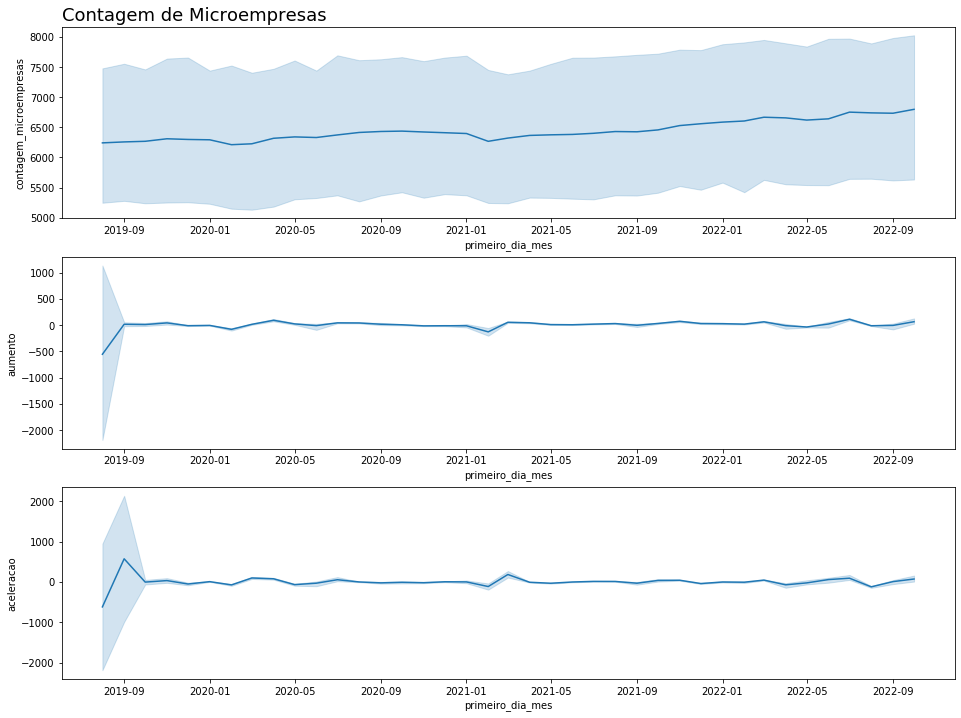

In [15]:
plot_comparacao('primeiro_dia_mes', 'contagem_microempresas', 'aumento','aceleracao', 
               dados, 'Contagem de Microempresas')

### Autocorrelação

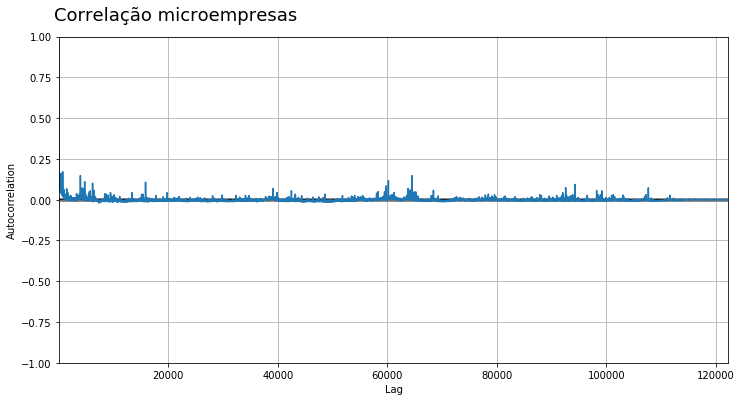

In [16]:
from pandas.plotting import autocorrelation_plot

ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação microempresas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(dados['contagem_microempresas'])
ax = ax

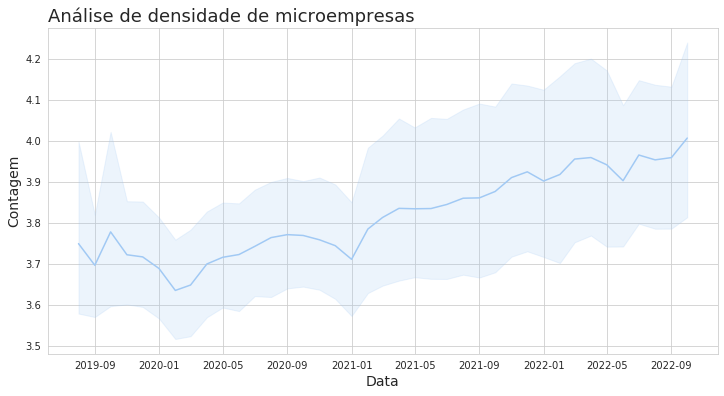

In [17]:
sns.set_palette('pastel')
sns.set_style('whitegrid')
ax = plt.figure(figsize=(12,6))
ax = sns.lineplot(x='primeiro_dia_mes', y='Densidade',
                 data = dados)
ax.set_title('Análise de densidade de microempresas', loc='left',
            fontsize=18)
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax = ax

### Adicionar nomes aos dias da semana

In [18]:
dados['dia_da_semana'] = dados['primeiro_dia_mes'].dt.day_name()
dados

,municipio,estado,primeiro_dia_mes,Densidade,contagem_microempresas,aumento,aceleracao,dia_da_semana
0,Autauga County,Alabama,2019-08-01,3.007682,1249,NaN,NaN,Thursday
1,Autauga County,Alabama,2019-09-01,2.884870,1198,-51.0,NaN,Sunday
2,Autauga County,Alabama,2019-10-01,3.055843,1269,71.0,122.0,Tuesday
3,Autauga County,Alabama,2019-11-01,2.993233,1243,-26.0,-97.0,Friday
4,Autauga County,Alabama,2019-12-01,2.993233,1243,0.0,26.0,Sunday
...,...,...,...,...,...,...,...,...
122260,Weston County,Wyoming,2022-06-01,1.803249,101,0.0,-2.0,Wednesday
122261,Weston County,Wyoming,2022-07-01,1.803249,101,0.0,0.0,Friday
122262,Weston County,Wyoming,2022-08-01,1.785396,100,-1.0,-1.0,Monday
122263,Weston County,Wyoming,2022-09-01,1.785396,100,0.0,1.0,Thursday


In [19]:
dados['dia_da_semana'].unique()

array(['Thursday', 'Sunday', 'Tuesday', 'Friday', 'Wednesday', 'Saturday',
       'Monday'], dtype=object)

### Agrupar os dados por dia da semana

> Houve um aumento na contagem de microempresas nos dias:Friday, wednesday

In [20]:
agrupar = dados.groupby('dia_da_semana')['contagem_microempresas', 'aumento','aceleracao'].mean().round()
agrupar

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,contagem_microempresas,aumento,aceleracao
dia_da_semana,,,
Friday,6485.0,30.0,2.0
Monday,6437.0,-5.0,-10.0
Saturday,6477.0,12.0,-9.0
Sunday,6375.0,-0.0,97.0
Thursday,6435.0,-99.0,-124.0
Tuesday,6460.0,17.0,1.0
Wednesday,6434.0,29.0,19.0


## <font color=teal>Agrupar por estado

In [21]:
agrupar2 = dados.groupby('estado')['contagem_microempresas', 'Densidade', 'aumento','aceleracao'].mean().round()
agrupar2.sort_values('contagem_microempresas')

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,contagem_microempresas,Densidade,aumento,aceleracao
estado,,,,
North Dakota,479.0,2.0,0.0,0.0
West Virginia,651.0,2.0,-2.0,-0.0
Mississippi,751.0,2.0,0.0,-0.0
Nebraska,924.0,3.0,-2.0,-0.0
Montana,936.0,4.0,-4.0,-0.0
South Dakota,1049.0,3.0,-6.0,-0.0
Alaska,1065.0,4.0,-1.0,0.0
Arkansas,1069.0,2.0,-1.0,-0.0
Iowa,1070.0,3.0,-0.0,-0.0


## <font color=teal>Histograma

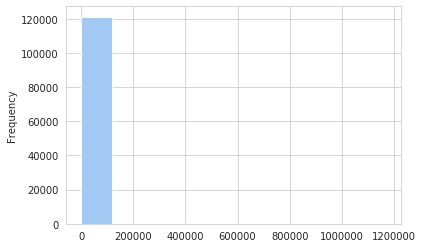

In [22]:
dados.contagem_microempresas.plot(kind='hist')

## <font color=teal>Gráfico de barras

### com amostra aleatórias de dados

In [23]:
amostras = dados.sample(12)

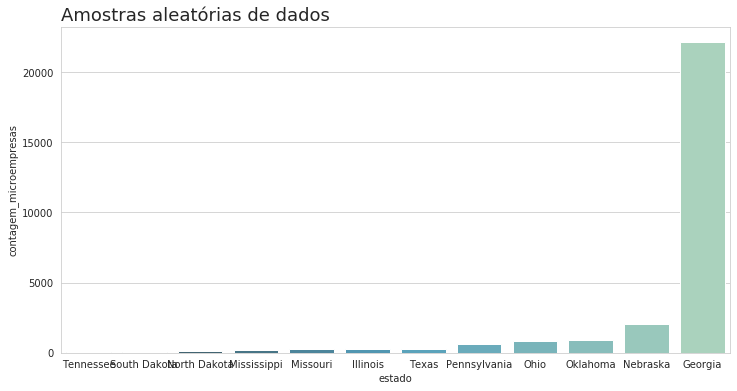

In [24]:
ax = sns.barplot(x='estado', y='contagem_microempresas', palette='GnBu_d',
                  data = amostras, order= amostras.sort_values('contagem_microempresas').estado)

ax.set_title('Amostras aleatórias de dados', loc='left',
            fontsize=18)

ax.figure.set_size_inches(12,6)

### Estado com mais microempresas

In [25]:
data2 = dados.query('estado in ["District of Columbia", "California", "Delaware", "Arizona", "Massachusetts", "Connecticut"]')
data2.estado.unique()

array(['Arizona', 'California', 'Connecticut', 'Delaware',
       'District of Columbia', 'Massachusetts'], dtype=object)

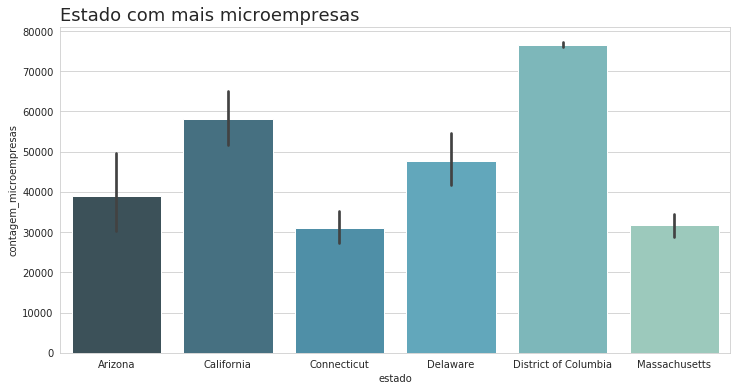

In [27]:
ax = sns.barplot(x='estado', y='contagem_microempresas', palette='GnBu_d', data = data2)

ax.set_title('Estado com mais microempresas', loc='left',
            fontsize=18)

ax.figure.set_size_inches(12,6)

### Estado com menos microempresas

In [28]:
data3 = dados.query('estado in ["North Dakota", "West Virginia", "Mississippi", "Nebraska", "Montana", "South Dakota"]')
data3.estado.unique()

array(['Mississippi', 'Montana', 'Nebraska', 'North Dakota',
       'South Dakota', 'West Virginia'], dtype=object)

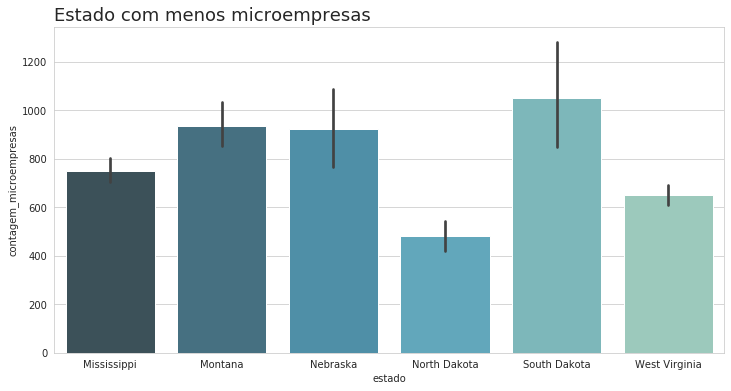

In [31]:
ax = sns.barplot(x='estado', y='contagem_microempresas', palette='GnBu_d', data = data3)

ax.set_title('Estado com menos microempresas', loc='left',
            fontsize=18)

ax.figure.set_size_inches(12,6)